In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import the daaset

df = pd.read_csv("winequality-red.csv", sep = ";")

In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
#take the features to work with

X = df.drop("quality", axis = 1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [ ]:
#Manual normalization

norm = pd.DataFrame()

for col in X.columns :
    m = X[col].mean()
    s = X[col].std()
    norm[f"norm[{col}]"] = (X[col]-m)/s

norm

,norm[fixed acidity],norm[volatile acidity],norm[citric acid],norm[residual sugar],norm[chlorides],norm[free sulfur dioxide],norm[total sulfur dioxide],norm[density],norm[pH],norm[sulphates],norm[alcohol]
0,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
1,-0.298454,1.966827,-1.391037,0.043403,0.223805,0.872365,0.624168,0.028252,-0.719708,0.128910,-0.584594
2,-0.298454,1.296660,-1.185699,-0.169374,0.096323,-0.083643,0.228975,0.134222,-0.331073,-0.048074,-0.584594
3,1.654339,-1.384011,1.483689,-0.453077,-0.264878,0.107558,0.411372,0.664069,-0.978798,-0.461036,-0.584594
4,-0.528194,0.961576,-1.391037,-0.453077,-0.243630,-0.466047,-0.379014,0.558100,1.288240,-0.579025,-0.959946
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217415,0.403103,-0.980362,-0.382151,0.053829,1.541571,-0.075020,-0.978459,0.899605,-0.461036,0.072271
1595,-1.389721,0.123866,-0.877693,-0.240300,-0.541090,2.210777,0.137777,-0.861893,1.353012,0.600867,0.729136
1596,-1.159980,-0.099523,-0.723690,-0.169374,-0.243630,1.254769,-0.196617,-0.533387,0.705287,0.541872,0.541460
1597,-1.389721,0.654416,-0.775024,-0.382151,-0.264878,1.541571,-0.075020,-0.676446,1.676875,0.305894,-0.209243


In [ ]:
#Verify that the mean after normalization is 0

norm.mean()

norm[fixed acidity]           4.088176e-16
norm[volatile acidity]        1.599721e-16
norm[citric acid]            -8.887339e-17
norm[residual sugar]         -1.155354e-16
norm[chlorides]               3.554936e-16
norm[free sulfur dioxide]    -4.443669e-17
norm[total sulfur dioxide]    3.554936e-17
norm[density]                -3.466062e-14
norm[pH]                      2.879498e-15
norm[sulphates]               6.754377e-16
norm[alcohol]                 8.887339e-17
dtype: float64

In [ ]:
#Verify that the standard deviation after normalization is 1

norm.std()

norm[fixed acidity]           1.0
norm[volatile acidity]        1.0
norm[citric acid]             1.0
norm[residual sugar]          1.0
norm[chlorides]               1.0
norm[free sulfur dioxide]     1.0
norm[total sulfur dioxide]    1.0
norm[density]                 1.0
norm[pH]                      1.0
norm[sulphates]               1.0
norm[alcohol]                 1.0
dtype: float64

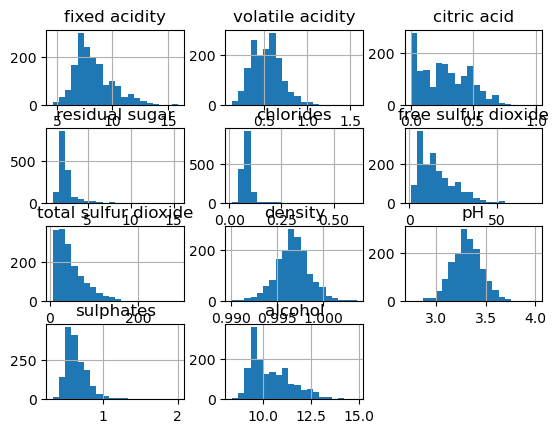

In [ ]:
#Visaulisation of the features before normalization

X.hist(bins=20)
plt.show()

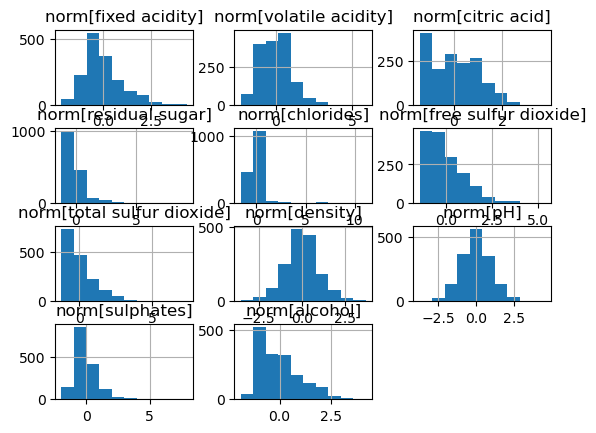

In [ ]:
#Visualisation of the normalized features

norm.hist(bins=10)
plt.show()